In [1]:
import numpy as np
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [92]:
img_path = "test13.jpg"

In [93]:
model = YOLO("best.pt")

In [94]:
detections = model(img_path)[0]


image 1/1 e:\My Projects\Number Plate detection\test13.jpg: 640x480 1 Back Plate, 66.7ms
Speed: 5.8ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


In [95]:
detections_ = []
for detection in detections.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = detection
    detections_.append([x1, y1, x2, y2, score])

In [96]:

try:
    fls = detections_[0]
    print(fls)
except IndexError:
    print("Unable to Detect")


[123.97533416748047, 239.95941162109375, 210.7415313720703, 298.1039123535156, 0.4215048849582672]


In [97]:
frame = cv2.imread(img_path)
crop = frame[int(fls[1]):int(fls[3]), int(fls[0]):int(fls[2])]

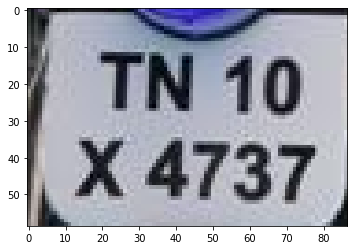

In [98]:
plt.imshow(crop)

# **OCR part**

In [99]:
crop_gray=cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

import easyocr
reader = easyocr.Reader(['ch_sim','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [100]:
result = reader.readtext(crop_gray)


In [101]:
mylist=list(result)
mylist

[([[16, 8], [78, 8], [78, 34], [16, 34]], 'TN 10', 0.890250919719841),
 ([[8, 30], [80, 30], [80, 56], [8, 56]], 'X4737', 0.6640013669664809)]

In [102]:
def contains_letters(s):
    return any(char.isalpha() for char in s)

def contains_numbers(s):
    return any(char.isdigit() for char in s)

In [103]:
numbers= []
for i in mylist:
    my_string = i[1]
    last_four_letters = my_string[-4:]
    if contains_numbers(last_four_letters):
        if contains_letters(last_four_letters):
            pass
        else:
            numbers.append(last_four_letters)   

In [104]:
numbers

['4737']

In [105]:
text_img = frame

cv2.rectangle(text_img, (int(fls[0]), int(fls[1])), (int(fls[2]), int(fls[3])),(255,0,0), 10)
res_img = cv2.putText(text_img, str(numbers) , (int(fls[0]), int(fls[1])), cv2.FONT_HERSHEY_SIMPLEX, 3, (36,255,12), 5)


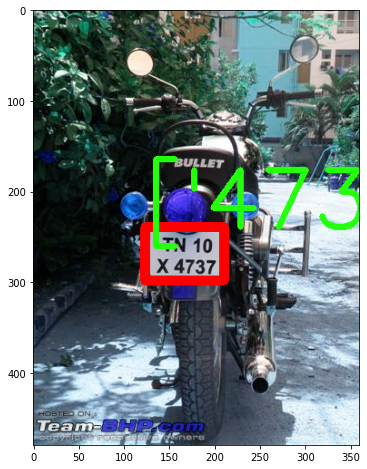

In [106]:
plt.figure(figsize=(10,8))
plt.imshow(res_img)